## 第一次上机任务  
`机卓2001 毛瑞琪   2023.5.12`
- 从HousingData.csv中读取波士顿房价数据
- 使用前400行数据(400个样本)，选取三个特征，训练线性回归模型（可以使用正则化),估计各区的房价中位数(“MEDV")
- 在最后100行数据（100个样本)上测试，评价测试结果
- 提示
  - 模型要求只能使用三个特征，哪三个特征效果比较好?
  - 请尽量在Jupyter Notebook 中保留所有信息（保留每一步的尝试)

>提交.ipynb文件和一份描述本次机器学习开发流程及结果的报告

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 读取数据
housing_data = pd.read_csv("HousingData.csv")
# 将所有缺失值替换为0
housing_data.fillna(0, inplace=True)

In [7]:
# 查看数据集的标签
print(housing_data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [8]:
# 随机选取特征和标签
#feature_cols = ['LSTAT', 'INDUS', 'AGE']
feature_cols = ['RM', 'LSTAT', 'PTRATIO']
target_col = 'MEDV'

X = housing_data[feature_cols]
y = housing_data[target_col]

# 划分训练集和测试集
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

初步设计的线性回归模型如下：
$$MEDV = \theta_0 + \theta_1 CRIM + \theta_2 ZN + \theta_3 AGE + \epsilon$$

In [9]:
# 对数据进行标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#训练线性回归模型
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# 训练岭回归模型
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# 训练Lasso回归模型
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)

# 比较三种模型的表现
for model in [linear_reg, ridge_reg, lasso_reg]:
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__} MSE: {mse:.2f}")

LinearRegression MSE: 33.46
Ridge MSE: 33.43
Lasso MSE: 41.84


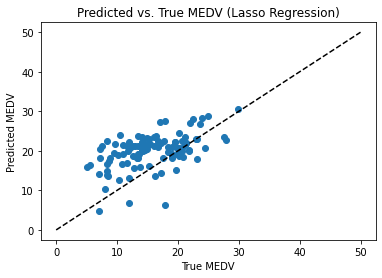

In [23]:
import matplotlib.pyplot as plt

# 绘制预测结果和真实结果的对比图
y_pred = lasso_reg.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], "--k")
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs. True MEDV (Lasso Regression)")
plt.show()

## 寻找最好的三个特征

**相关性分析:** 计算每个特征与目标变量之间的相关系数，并选择相关系数较高的特征。可以使用pandas 库中的corr()函数来计算相关系数矩阵，然后选择相关系数较高的特征。例如，可以选择与目标变量的相关系数绝对值大于某个阈值（比如0.5)）的特征。


In [11]:
## 相关性分析寻找
corr_matrix = housing_data.corr()
print(corr_matrix["MEDV"].abs().sort_values(ascending=False))

MEDV       1.000000
LSTAT      0.695405
RM         0.695360
PTRATIO    0.507787
TAX        0.468536
INDUS      0.441371
NOX        0.427321
CRIM       0.384120
RAD        0.381626
ZN         0.362292
AGE        0.356699
B          0.333461
DIS        0.249929
CHAS       0.183844
Name: MEDV, dtype: float64


**随机森林:** 使用随机森林模型可以计算每个特征的重要性分数，并选择重要性分数较高的特征。可以使用scikit-learn库中的RandomForestRegressor()函数来训练随机森林模型，并选择重要性分数较高的特征。


In [12]:
from sklearn.ensemble import RandomForestRegressor

# 将特征和标签分开
X = housing_data.drop("MEDV", axis=1)
y = housing_data["MEDV"]

# 训练随机森林模型并计算特征重要性参数
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)
feature_importances = rf_reg.feature_importances_

# 将特征重要性参数和特征名称联系起来
feature_importances_df = pd.DataFrame({"feature": X.columns, "importance": feature_importances})

# 按照重要性参数的大小进行排序
feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

# 打印特征重要性参数和特征名称
print(feature_importances_df)

    feature  importance
5        RM    0.500760
12    LSTAT    0.286000
7       DIS    0.072558
0      CRIM    0.043952
4       NOX    0.025284
10  PTRATIO    0.020015
9       TAX    0.014988
6       AGE    0.014238
11        B    0.011424
2     INDUS    0.005237
8       RAD    0.003409
3      CHAS    0.001163
1        ZN    0.000972


### 于是我们选择RM LSTAT PTRATIO 进行训练

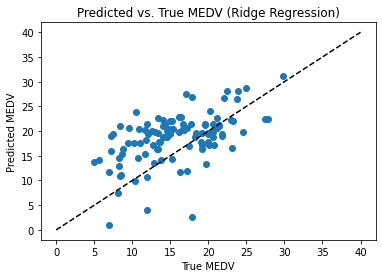

In [13]:
feature_cols = ['RM', 'LSTAT', 'PTRATIO']
target_col = 'MEDV'

X = housing_data[feature_cols]
y = housing_data[target_col]

# 划分训练集和测试集
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

# 对数据进行标准化处理 ！！这一步很重要
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练线性回归模型
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# 绘制预测结果和真实结果的对比图
y_pred = linear_reg.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot([0, 40], [0, 40], "--k")
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs. True MEDV (Ridge Regression)")
plt.show()

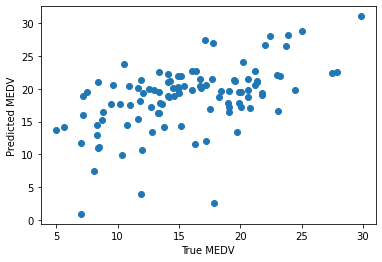

In [14]:
# 在测试集上进行预测
y_pred = linear_reg.predict(X_test_scaled)

# 绘制散点图
plt.scatter(y_test, y_pred)
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.show()

-4.276030252504813


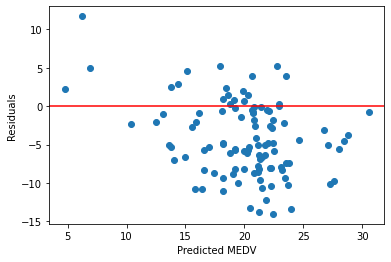

In [25]:
# 计算预测误差
residuals = y_test - y_pred
print(np.mean(residuals))
# 绘制残差图
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

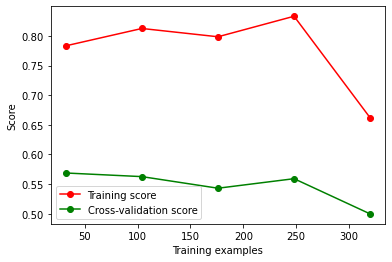

In [16]:
from sklearn.model_selection import learning_curve

# 计算学习曲线
train_sizes, train_scores, test_scores = learning_curve(linear_reg, X_train_scaled, y_train, cv=5)

# 绘制学习曲线
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## 寻找最好的特征

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from itertools import combinations

# 选择所有特征
all_features = housing_data.columns.tolist()
all_features.remove("MEDV")  # 去掉目标变量

# 交叉验证选择特征
selected_features = []
for i in range(3):
    best_feature = None
    best_score = -np.inf
    other_features = [f for f in all_features if f not in selected_features]
    feature_combinations = list(combinations(other_features, i+1))
    for features in feature_combinations:
        features = list(features) + selected_features
        scores = cross_val_score(LinearRegression(), housing_data[features], housing_data["MEDV"], cv=5)
        score = np.mean(scores)
        print("特征集合: {}, 交叉验证得分: {:.3f}".format(features, score))
        if score > best_score:
            best_feature = features[-1]
            best_score = score
    selected_features.append(best_feature)

print("最优的三个特征: ", selected_features)

特征集合: ['CRIM'], 交叉验证得分: -0.330
特征集合: ['ZN'], 交叉验证得分: -0.441
特征集合: ['INDUS'], 交叉验证得分: -0.277
特征集合: ['CHAS'], 交叉验证得分: -0.646
特征集合: ['NOX'], 交叉验证得分: -0.308
特征集合: ['RM'], 交叉验证得分: -0.030
特征集合: ['AGE'], 交叉验证得分: -0.402
特征集合: ['DIS'], 交叉验证得分: -0.597
特征集合: ['RAD'], 交叉验证得分: -0.288
特征集合: ['TAX'], 交叉验证得分: -0.168
特征集合: ['PTRATIO'], 交叉验证得分: -0.160
特征集合: ['B'], 交叉验证得分: -0.311
特征集合: ['LSTAT'], 交叉验证得分: 0.180
特征集合: ['CRIM', 'ZN', 'LSTAT'], 交叉验证得分: 0.243
特征集合: ['CRIM', 'INDUS', 'LSTAT'], 交叉验证得分: 0.204
特征集合: ['CRIM', 'CHAS', 'LSTAT'], 交叉验证得分: 0.248
特征集合: ['CRIM', 'NOX', 'LSTAT'], 交叉验证得分: 0.168
特征集合: ['CRIM', 'RM', 'LSTAT'], 交叉验证得分: 0.291
特征集合: ['CRIM', 'AGE', 'LSTAT'], 交叉验证得分: 0.193
特征集合: ['CRIM', 'DIS', 'LSTAT'], 交叉验证得分: 0.168
特征集合: ['CRIM', 'RAD', 'LSTAT'], 交叉验证得分: 0.167
特征集合: ['CRIM', 'TAX', 'LSTAT'], 交叉验证得分: 0.200
特征集合: ['CRIM', 'PTRATIO', 'LSTAT'], 交叉验证得分: 0.368
特征集合: ['CRIM', 'B', 'LSTAT'], 交叉验证得分: 0.217
特征集合: ['ZN', 'INDUS', 'LSTAT'], 交叉验证得分: 0.209
特征集合: ['ZN', 'CHAS', 'LSTAT'], 交叉验证得分: 0.268
特征集合:

In [18]:
from sklearn.metrics import mean_squared_error

# 从csv文件读取数据
data = pd.read_csv("HousingData.csv")
# 将所有缺失值替换为0
data.fillna(0, inplace=True)
# 选择所有特征
all_features = data.columns.tolist()
all_features.remove("MEDV")  # 去掉目标变量
min_mse = 100.00
min_feature = ''
# 逐个选择特征，训练模型并评价
for feature in all_features:
    X = data[[feature]]
    y = data["MEDV"]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print("特征:{}, MSE:{:.2f}".format(feature, mse))
    if mse < min_mse: 
        min_mse = mse 
        min_feature = feature

print("最佳单个特征:{}, MSE:{:.2f}".format(min_feature, min_mse))


特征:CRIM, MSE:71.96
特征:ZN, MSE:73.34
特征:INDUS, MSE:67.97
特征:CHAS, MSE:81.57
特征:NOX, MSE:69.00
特征:RM, MSE:43.60
特征:AGE, MSE:73.68
特征:DIS, MSE:79.15
特征:RAD, MSE:72.12
特征:TAX, MSE:65.89
特征:PTRATIO, MSE:62.65
特征:B, MSE:75.03
特征:LSTAT, MSE:43.60
最佳单个特征:LSTAT, MSE:43.60


初始选择的特征： ['LSTAT']
初始模型的MSE： 43.59525437958744
选择的特征组合： ['LSTAT', 'RM', 'PTRATIO']
模型的MSE： 28.64770717657424


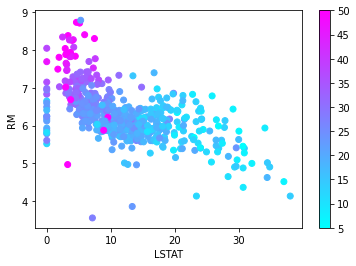

选择的特征组合： ['LSTAT', 'RM', 'PTRATIO', 'NOX', 'DIS']
模型的MSE： 26.121769038342826


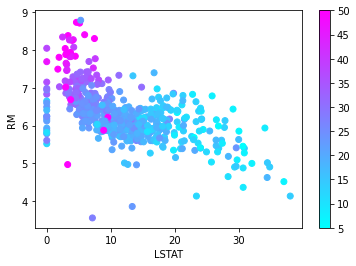

选择的特征组合： ['LSTAT', 'RM', 'PTRATIO', 'NOX', 'DIS', 'CHAS', 'B']
模型的MSE： 24.76398539234013


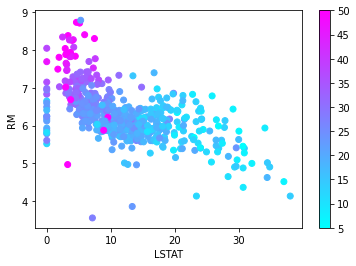

选择的特征组合： ['LSTAT', 'RM', 'PTRATIO', 'NOX', 'DIS', 'CHAS', 'B', 'CRIM', 'ZN']
模型的MSE： 24.059073951095698


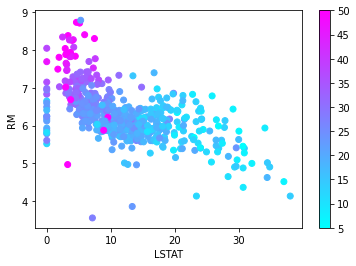

选择的特征组合： ['LSTAT', 'RM', 'PTRATIO', 'NOX', 'DIS', 'CHAS', 'B', 'CRIM', 'ZN', 'RAD', 'TAX']
模型的MSE： 23.175500761918034


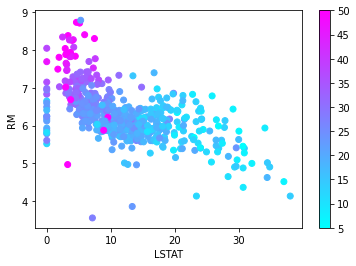

选择的特征组合： ['LSTAT', 'RM', 'PTRATIO', 'NOX', 'DIS', 'CHAS', 'B', 'CRIM', 'ZN', 'RAD', 'TAX', 'INDUS', 'AGE']
模型的MSE： 23.058285025816215


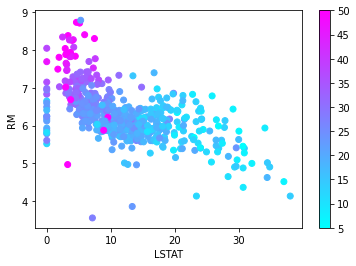

In [19]:
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# 从csv文件读取数据
data = pd.read_csv("HousingData.csv")
# 将所有缺失值替换为0
data.fillna(0, inplace=True)
# 选择特征LSTAT
selected_features = ["LSTAT"]
X = data[selected_features]
y = data["MEDV"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("初始选择的特征：", selected_features)
print("初始模型的MSE：", mse)

# 每次选取两个特征，其中包括LSTAT，与剩下的特征依次组合成新的特征组合，并评估模型性能
all_features = data.columns.tolist()
all_features.remove("MEDV")  # 去掉目标变量
all_features.remove("LSTAT")  # 去掉已选择的特征
n_features = len(all_features)
for i in range(n_features):
    best_mse = mse
    best_features = None
    for features in combinations(all_features, 2):
        new_features = selected_features + list(features)
        X = data[new_features]
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        mse_new = mean_squared_error(y, y_pred)
        if mse_new < best_mse:
            best_mse = mse_new
            best_features = features
    if best_mse < mse:
        selected_features += list(best_features)
        mse = best_mse
        all_features.remove(best_features[0])
        all_features.remove(best_features[1])
        print("选择的特征组合：", selected_features)
        print("模型的MSE：", mse)
      # 可视化选择的两个特征和目标变量之间的关系
        plt.scatter(data[selected_features[0]], data[selected_features[1]], c=data["MEDV"], cmap="cool")
        plt.xlabel(selected_features[0])
        plt.ylabel(selected_features[1])
        plt.colorbar()
        plt.show()
    else:
        break

在这个代码中，我们首先选择特征LSTAT，然后每次选取两个特征，其中包括LSTAT，与剩下的特征依次组合成新的特征组合。具体来说，我们使用itertools库中的combinations函数，从剩下的特征中选择两个特征，与LSTAT组成新的特征组合。然后，我们训练线性回归模型，并计算模型的MSE。重复这个过程，直到不能再找到性能更好的特征组合为止。

需要注意的是，这个代码中同样使用了贪心算法，它不能保证得到最优的特征组合。如果需要更加准确和鲁棒的特征选择方法，可以考虑使用其他特征选择方法，例如基于模型的选择方法、正则化方法等。同时，需要根据具体的数据和任务，选择适合的特征选择方法，以获得更好的模型性能。